<a href="https://colab.research.google.com/github/desaivaibhav95/Machine-Learning-Classification-and-Regression-/blob/master/Credit_Card_Delinquency_prediction(log_loss_0.2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading Data into the terminal

In [2]:
data = pd.read_csv("/content/drive/My Drive/Kaggle Datasets /Give me some credit/cs-training.csv")

In [3]:
data.drop(columns = ['Unnamed: 0'], inplace = True)

In [4]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

## Data Cleaning

In [6]:
data.shape

(150000, 11)

In [7]:
data['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [8]:
data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [9]:
data.corr()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,-0.001802,-0.115386,0.125587,-0.007602,-0.019746,-0.029669,0.117175,-0.007038,0.102261,0.046048
RevolvingUtilizationOfUnsecuredLines,-0.001802,1.000000,-0.005898,-0.001314,0.003961,0.007124,-0.011281,-0.001061,0.006235,-0.001048,0.001557
age,-0.115386,-0.005898,1.000000,-0.062995,0.024188,0.037717,0.147705,-0.061005,0.033150,-0.057159,-0.213303
NumberOfTime30-59DaysPastDueNotWorse,0.125587,-0.001314,-0.062995,1.000000,-0.006542,-0.010217,-0.055312,0.983603,-0.030565,0.987005,-0.002680
DebtRatio,-0.007602,0.003961,0.024188,-0.006542,1.000000,-0.028712,0.049565,-0.008320,0.120046,-0.007533,-0.040673
MonthlyIncome,-0.019746,0.007124,0.037717,-0.010217,-0.028712,1.000000,0.091455,-0.012743,0.124959,-0.011116,0.062647
NumberOfOpenCreditLinesAndLoans,-0.029669,-0.011281,0.147705,-0.055312,0.049565,0.091455,1.000000,-0.079984,0.433959,-0.071077,0.065322
NumberOfTimes90DaysLate,0.117175,-0.001061,-0.061005,0.983603,-0.008320,-0.012743,-0.079984,1.000000,-0.045205,0.992796,-0.010176
NumberRealEstateLoansOrLines,-0.007038,0.006235,0.033150,-0.030565,0.120046,0.124959,0.433959,-0.045205,1.000000,-0.039722,0.124684
NumberOfTime60-89DaysPastDueNotWorse,0.102261,-0.001048,-0.057159,0.987005,-0.007533,-0.011116,-0.071077,0.992796,-0.039722,1.000000,-0.010922


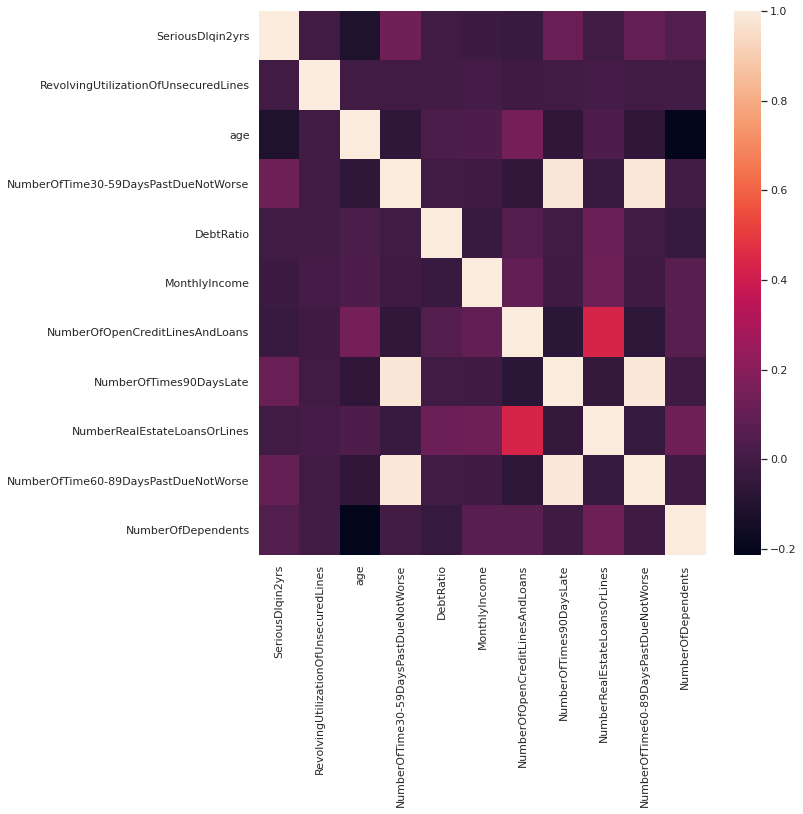

In [10]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(method = 'pearson'))

In [11]:
data.dropna(inplace = True)

In [12]:
split = np.random.rand(len(data)) < 0.8
train = data[split]
test = data[~split]

In [13]:
train['SeriousDlqin2yrs'].value_counts()

0    89571
1     6706
Name: SeriousDlqin2yrs, dtype: int64

In [14]:
test['SeriousDlqin2yrs'].value_counts()

0    22341
1     1651
Name: SeriousDlqin2yrs, dtype: int64

## Data Wrangling and Exploratory Data Analysis(EDA)

### Target

In [15]:
target_0 = train.loc[train['SeriousDlqin2yrs'] == 0]
target_1 = train.loc[train['SeriousDlqin2yrs'] == 1]

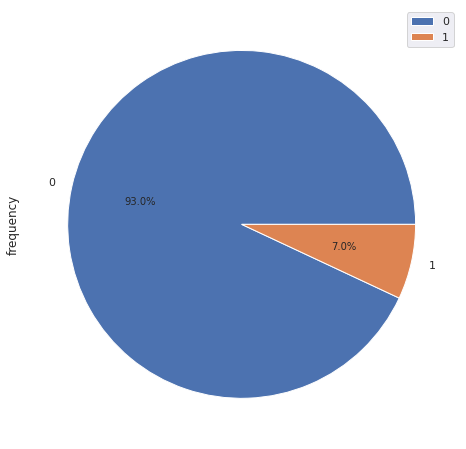

In [16]:
pd.DataFrame({'frequency': [target_0['SeriousDlqin2yrs'].count(), target_1['SeriousDlqin2yrs'].count()],
              'index' : ['0','1']}).plot.pie(y = 'frequency', figsize = (8,8), autopct='%1.1f%%')

### Debt Ratio

In [17]:
train['DebtRatio'].describe()

count    96277.000000
mean        27.903067
std        459.427689
min          0.000000
25%          0.143942
50%          0.295951
75%          0.481669
max      61106.500000
Name: DebtRatio, dtype: float64

In [18]:
for a in [0.99]:
  print("{:.2f}".format(train['DebtRatio'].quantile(a)))

688.96


In [19]:
train.drop(train[train['DebtRatio'] > 2].index, inplace = True)
test.drop(test[test['DebtRatio'] > 2].index, inplace = True)

In [20]:
train['DebtRatio'].replace({0.0 : train['DebtRatio'].mean()}, inplace = True)
test['DebtRatio'].replace({0.0 : test['DebtRatio'].mean()}, inplace = True)

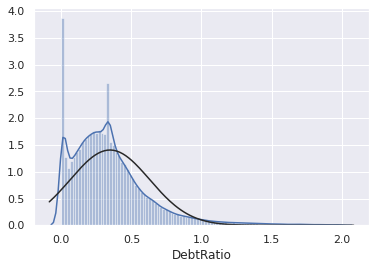

In [21]:
from scipy.stats import norm
sns.distplot(train['DebtRatio'], fit = norm, bins = 100)
sns.set(rc = {'figure.figsize':(10,8)})

In [22]:
train['DebtRatio'].describe()

count    93604.000000
mean         0.346939
std          0.283689
min          0.000026
25%          0.152936
50%          0.300099
75%          0.461262
max          2.000000
Name: DebtRatio, dtype: float64

### Monthly Income

In [23]:
train['MonthlyIncome'].describe()

count    9.360400e+04
mean     6.849520e+03
std      1.471363e+04
min      0.000000e+00
25%      3.500000e+03
50%      5.500000e+03
75%      8.333000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [24]:
train.drop(train[train['MonthlyIncome'] < 500].index, inplace = True)
test.drop(test[test['MonthlyIncome'] < 500].index, inplace = True)

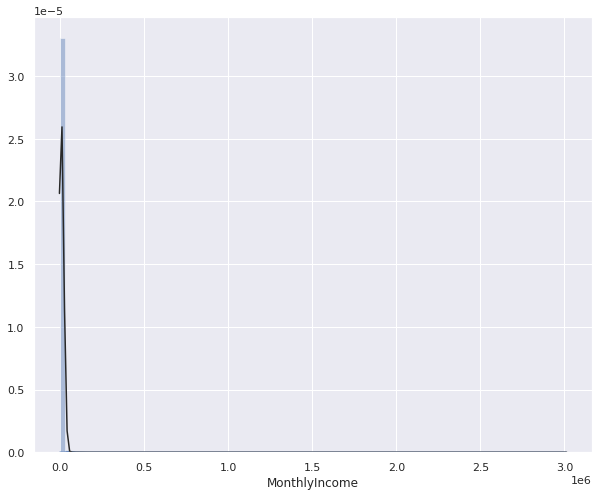

In [25]:
from scipy.stats import norm
sns.distplot(train['MonthlyIncome'], fit = norm, bins = 100)
sns.set(rc = {'figure.figsize':(10,8)})

### Revolving utilization of unsecured lines

In [26]:
train['RevolvingUtilizationOfUnsecuredLines'].describe()

count    93259.000000
mean         6.336003
std        274.644096
min          0.000000
25%          0.035488
50%          0.178962
75%          0.579647
max      50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

#### There are some entries in the 'Revolving utiizationofunsecuredlines' column that are large values. However, it seems that these aren't random values and might just be from a different source and so were assembled with the data without normalizing.

#### Hence, rather than replacing these values with a mean or some other metric. Let's just simply normalize them by scaling them down within the limits of the metric, i.e. 0-1.

In [27]:
for a in train['RevolvingUtilizationOfUnsecuredLines']:
  if a > 1:
    train['RevolvingUtilizationOfUnsecuredLines'].replace({a:a/100000}, inplace = True)

In [28]:
for a in test['RevolvingUtilizationOfUnsecuredLines']:
  if a > 1:
    test['RevolvingUtilizationOfUnsecuredLines'].replace({a:a/100000}, inplace = True)

In [29]:
train['RevolvingUtilizationOfUnsecuredLines'].describe()

count    93259.000000
mean         0.307337
std          0.334459
min          0.000000
25%          0.029481
50%          0.157373
75%          0.526547
max          1.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [30]:
train.loc[train['RevolvingUtilizationOfUnsecuredLines'] == 0]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
85,0,0.0,58,0,0.316145,4886.0,9,0,1,0,1.0
126,0,0.0,61,0,0.222660,3300.0,14,0,1,0,0.0
127,0,0.0,59,0,0.218854,19167.0,13,0,2,0,0.0
129,0,0.0,59,0,0.351700,4500.0,12,0,1,0,0.0
132,0,0.0,48,0,0.517469,4550.0,7,0,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149893,0,0.0,41,0,0.131958,25833.0,12,0,1,0,5.0
149901,0,0.0,94,0,0.339667,3600.0,4,0,0,0,0.0
149902,0,0.0,80,0,0.339667,1600.0,1,0,0,0,0.0
149933,0,0.0,56,0,0.494101,5000.0,8,0,1,0,0.0


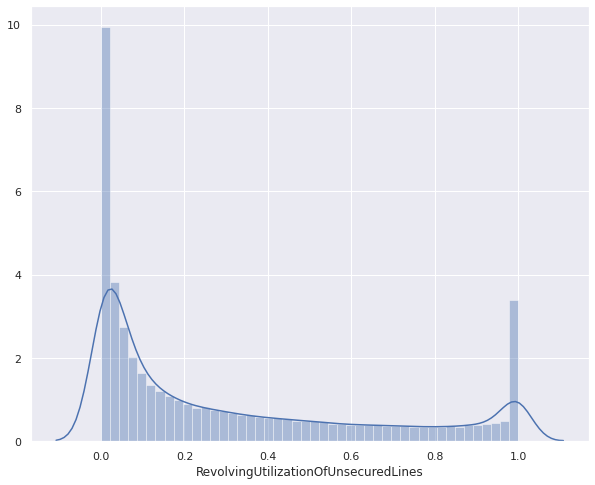

In [31]:
sns.distplot(train['RevolvingUtilizationOfUnsecuredLines'])
sns.set(rc = {'figure.figsize':(8,5)})

In [32]:
train.shape

(93259, 11)

### EDA (Summarization of some important features w.r.t the target)

Text(0, 0.5, 'Avg. Monthly Income')

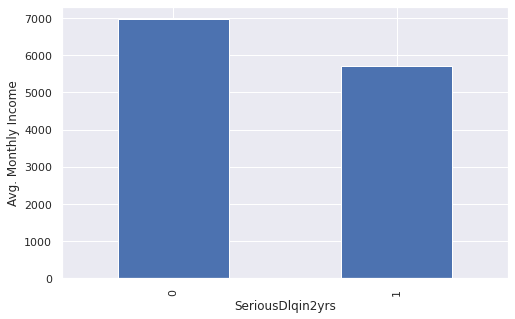

In [33]:
train.groupby(['SeriousDlqin2yrs'])['MonthlyIncome'].mean().plot(kind = 'bar', figsize = (8,5))
plt.ylabel('Avg. Monthly Income')

Text(0, 0.5, 'Avg.(Monthly liabilities/ Monthly Income)')

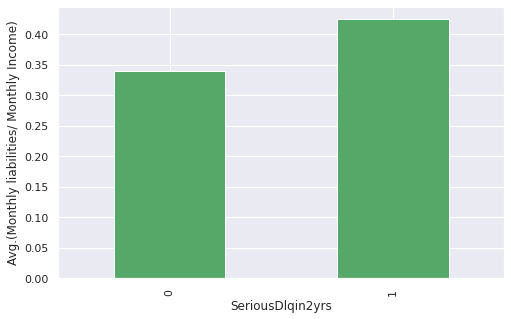

In [34]:
train.groupby(['SeriousDlqin2yrs'])['DebtRatio'].mean().plot(kind = 'bar', color = 'g', figsize = (8,5))
plt.ylabel('Avg.(Monthly liabilities/ Monthly Income)')

In [35]:
train.groupby(['SeriousDlqin2yrs'])['NumberOfOpenCreditLinesAndLoans'].agg(['mean', 'median'])

,mean,median
SeriousDlqin2yrs,,
0,8.824320,8
1,8.143646,7


In [36]:
delinq_2_month_target_0 = train.loc[(train['SeriousDlqin2yrs'] == 0) & (train['NumberOfTime30-59DaysPastDueNotWorse'] != 0)]
delinq_2_month_target_1 = train.loc[(train['SeriousDlqin2yrs'] == 1) & (train['NumberOfTime30-59DaysPastDueNotWorse'] != 0)]

In [37]:
delinq_2_month_target_0['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

1     8907
2     2252
3      765
4      275
5      133
6       49
98      38
7       19
8       10
9        5
12       1
96       1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [38]:
delinq_2_month_target_1['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

1     1571
2      796
3      423
4      212
5      104
98      64
6       48
7       19
8        7
9        3
96       3
10       2
13       1
11       1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [39]:
delinq_3_month_target_0 = train.loc[(train['SeriousDlqin2yrs'] == 0) & (train['NumberOfTime60-89DaysPastDueNotWorse'] != 0)]
delinq_3_month_target_1 = train.loc[(train['SeriousDlqin2yrs'] == 1) & (train['NumberOfTime60-89DaysPastDueNotWorse'] != 0)]

In [40]:
delinq_3_month_target_0['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

1     2607
2      348
3       75
98      38
4       25
5        9
7        3
6        3
96       1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [41]:
delinq_3_month_target_1['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

1     1151
2      357
3      122
98      64
4       39
5       13
6        9
96       3
7        3
11       1
8        1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [42]:
target_0['NumberOfDependents'].value_counts()

0.0     49242
1.0     18075
2.0     13234
3.0      6423
4.0      1909
5.0       522
6.0       104
7.0        35
8.0        18
10.0        5
9.0         3
13.0        1
Name: NumberOfDependents, dtype: int64

In [43]:
target_1['NumberOfDependents'].value_counts()

0.0    3152
1.0    1456
2.0    1192
3.0     615
4.0     225
5.0      48
6.0      13
7.0       3
8.0       2
Name: NumberOfDependents, dtype: int64

In [44]:
target_0_loans = target_0.loc[:,['SeriousDlqin2yrs','NumberOfOpenCreditLinesAndLoans']]
target_1_loans = target_1.loc[:,['SeriousDlqin2yrs','NumberOfOpenCreditLinesAndLoans']]

Text(0, 0.5, 'No. of people(target 0)')

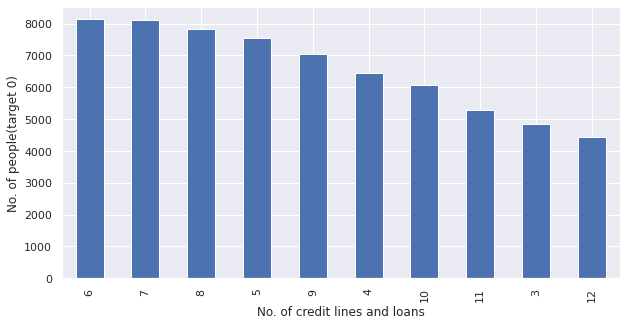

In [45]:
target_0_loans['NumberOfOpenCreditLinesAndLoans'].value_counts().head(10).plot(kind = 'bar', figsize = (10,5))
plt.xlabel('No. of credit lines and loans')
plt.ylabel('No. of people(target 0)')

Text(0, 0.5, 'No. of people(target 1)')

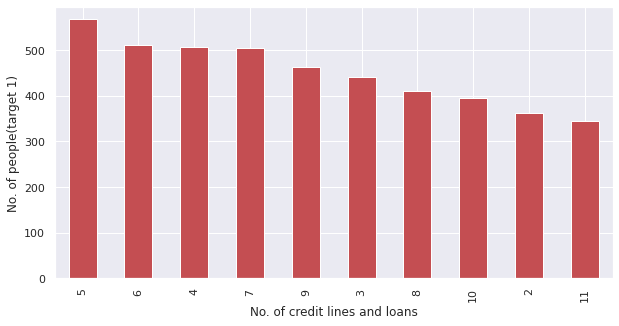

In [46]:
target_1_loans['NumberOfOpenCreditLinesAndLoans'].value_counts().head(10).plot(kind = 'bar', figsize = (10,5), color = 'r')
plt.xlabel('No. of credit lines and loans')
plt.ylabel('No. of people(target 1)')

In [47]:
target_0_real_estate_loans = target_0.loc[:,['SeriousDlqin2yrs','NumberRealEstateLoansOrLines']]

In [48]:
target_1_real_estate_loans = target_1.loc[:,['SeriousDlqin2yrs','NumberRealEstateLoansOrLines']]

Text(0, 0.5, 'No. of people(target 0)')

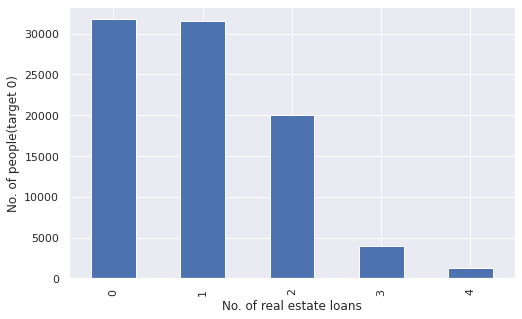

In [49]:
target_0_real_estate_loans['NumberRealEstateLoansOrLines'].value_counts().head().plot(kind = 'bar', figsize = (8,5))
plt.xlabel('No. of real estate loans')
plt.ylabel('No. of people(target 0)')

Text(0, 0.5, 'No. of people (target 1)')

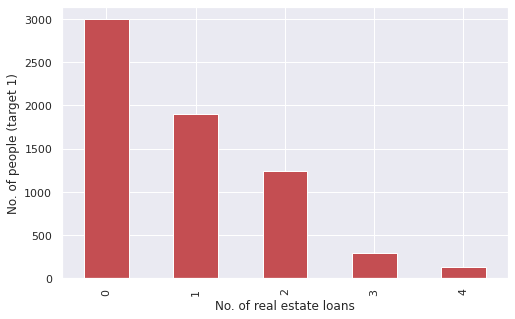

In [50]:
target_1_real_estate_loans['NumberRealEstateLoansOrLines'].value_counts().head().plot(kind = 'bar', color = 'r', figsize = (8,5))
plt.xlabel('No. of real estate loans')
plt.ylabel('No. of people (target 1)')

In [51]:
target_1.loc[target_1['RevolvingUtilizationOfUnsecuredLines'] > 1]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
162,1,1.046279,47,1,1.104301,5416.0,6,0,2,0,1.0
251,1,1.048211,58,7,0.151957,3500.0,12,0,0,0,0.0
697,1,2066.000000,58,0,0.271121,6000.0,8,1,1,0,1.0
793,1,1.257485,26,0,0.129805,1794.0,1,2,0,1,0.0
1285,1,1.008516,59,1,2.219737,5633.0,23,0,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
148828,1,73.846154,53,2,0.513355,7000.0,5,8,2,0,4.0
149069,1,1.027421,42,0,0.213957,5000.0,3,4,0,0,1.0
149223,1,1.007421,38,1,1.781955,664.0,8,3,0,0,2.0
149308,1,1.030881,42,0,0.013072,2600.0,3,1,0,0,1.0


In [52]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [53]:
train['TotalNumberOfLoansandCreditLines'] = train['NumberOfOpenCreditLinesAndLoans'] + train['NumberRealEstateLoansOrLines']
train.drop(columns = ['NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines'], inplace = True)

In [54]:
test['TotalNumberOfLoansandCreditLines'] = test['NumberOfOpenCreditLinesAndLoans'] + test['NumberRealEstateLoansOrLines']
test.drop(columns = ['NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines'], inplace = True)

In [55]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,TotalNumberOfLoansandCreditLines
0,1,0.766127,45,2,0.802982,9120.0,0,0,2.0,19
1,0,0.957151,40,0,0.121876,2600.0,0,0,1.0,4
2,0,0.658180,38,1,0.085113,3042.0,1,0,0.0,2
3,0,0.233810,30,0,0.036050,3300.0,0,0,0.0,5
4,0,0.907239,49,1,0.024926,63588.0,0,0,0.0,8


In [56]:
train_y = train['SeriousDlqin2yrs']
train.drop(columns = ['SeriousDlqin2yrs'], inplace=True)

In [57]:
test_y = test['SeriousDlqin2yrs']
test.drop(columns = ['SeriousDlqin2yrs'], inplace=True)

In [58]:
train['Number_of_times_upto_90days_late'] = train['NumberOfTime30-59DaysPastDueNotWorse'] + train['NumberOfTime60-89DaysPastDueNotWorse']
train.drop(columns = ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse'], inplace = True)

In [59]:
test['Number_of_times_upto_90days_late'] = test['NumberOfTime30-59DaysPastDueNotWorse'] + test['NumberOfTime60-89DaysPastDueNotWorse']
test.drop(columns = ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse'], inplace = True)

In [60]:
train.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfTimes90DaysLate,NumberOfDependents,TotalNumberOfLoansandCreditLines,Number_of_times_upto_90days_late
0,0.766127,45,0.802982,9120.0,0,2.0,19,2
1,0.957151,40,0.121876,2600.0,0,1.0,4,0
2,0.658180,38,0.085113,3042.0,1,0.0,2,1
3,0.233810,30,0.036050,3300.0,0,0.0,5,0
4,0.907239,49,0.024926,63588.0,0,0.0,8,1


## Data Normalization and Preprocessing

In [61]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [62]:
train.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfTimes90DaysLate,NumberOfDependents,TotalNumberOfLoansandCreditLines,Number_of_times_upto_90days_late
0,0.766127,45,0.802982,9120.0,0,2.0,19,2
1,0.957151,40,0.121876,2600.0,0,1.0,4,0
2,0.658180,38,0.085113,3042.0,1,0.0,2,1
3,0.233810,30,0.036050,3300.0,0,0.0,5,0
4,0.907239,49,0.024926,63588.0,0,0.0,8,1


#### Standard Scaling of continuous features

In [63]:
train_cont_cols = train.loc[:,['RevolvingUtilizationOfUnsecuredLines', 'MonthlyIncome','DebtRatio']]
test_cont_cols = test.loc[:,['RevolvingUtilizationOfUnsecuredLines', 'MonthlyIncome','DebtRatio']]

ss = StandardScaler()
ss_cols_train = pd.DataFrame(ss.fit_transform(train_cont_cols))
ss_cols_test = pd.DataFrame(ss.fit_transform(test_cont_cols))

In [64]:
ss_cols_train.columns = ['Revolving_Utilization_Of_Unsecured_Lines', 'Monthly_Income', 'Debt_Ratio']
ss_cols_test.columns = ['Revolving_Utilization_Of_Unsecured_Lines', 'Monthly_Income', 'Debt_Ratio']

In [65]:
train.drop(columns = ['RevolvingUtilizationOfUnsecuredLines', 'MonthlyIncome','DebtRatio'], inplace = True)

In [66]:
test.drop(columns = ['RevolvingUtilizationOfUnsecuredLines', 'MonthlyIncome','DebtRatio'], inplace = True)

#### Label Encoding of Categorical columns

In [67]:
le = LabelEncoder()

train['NumberOfTimes90DaysLate'] = le.fit_transform(train['NumberOfTimes90DaysLate'])
train['NumberOfDependents'] = le.fit_transform(train['NumberOfDependents'])
train['TotalNumberOfLoansandCreditLines'] = le.fit_transform(train['TotalNumberOfLoansandCreditLines'])
train['Number_of_times_upto_90days_late'] = le.fit_transform(train['Number_of_times_upto_90days_late'])

test['NumberOfTimes90DaysLate'] = le.fit_transform(test['NumberOfTimes90DaysLate'])
test['NumberOfDependents'] = le.fit_transform(test['NumberOfDependents'])
test['TotalNumberOfLoansandCreditLines'] = le.fit_transform(test['TotalNumberOfLoansandCreditLines'])
test['Number_of_times_upto_90days_late'] = le.fit_transform(test['Number_of_times_upto_90days_late'])

In [68]:
ss_cols_train.tail()

,Revolving_Utilization_Of_Unsecured_Lines,Monthly_Income,Debt_Ratio
93254,2.071006,-0.410865,-0.023385
93255,0.234427,-0.235774,0.205506
93256,-0.022698,-0.087557,1.311501
93257,-0.918911,-0.078598,-0.023385
93258,1.623365,0.087128,-0.341293


In [69]:
train.reset_index(inplace = True)
test.reset_index(inplace = True)

In [70]:
train.drop(columns = ['index'], inplace = True)
test.drop(columns = ['index'], inplace = True)

In [71]:
train_final = pd.concat(objs = [train,ss_cols_train], axis = 1)
test_final = pd.concat(objs = [test, ss_cols_test], axis = 1)

## Model Building and Evaluation

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, log_loss

In [73]:
random_state = np.random.RandomState(0)

### Logistic Regression

In [74]:
lr = LogisticRegression(max_iter = 200, random_state = random_state)
model_lr = lr.fit(train_final,train_y)

In [75]:
pred_lr = model_lr.predict(test_final)

In [76]:
print("Accuracy(LR) : {:.2f}".format(accuracy_score(test_y,pred_lr)))

Accuracy(LR) : 0.93


In [77]:
confusion_matrix(test_y,pred_lr)

array([[21535,   136],
       [ 1436,   184]])

In [78]:
print(classification_report(test_y,pred_lr))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     21671
           1       0.57      0.11      0.19      1620

    accuracy                           0.93     23291
   macro avg       0.76      0.55      0.58     23291
weighted avg       0.91      0.93      0.91     23291



In [79]:
print("ROC AUC Score : {:.2f}".format(roc_auc_score(test_y,pred_lr)))

ROC AUC Score : 0.55


In [80]:
prob_lr = model_lr.predict_proba(test_final)

In [81]:
prob_lr = prob_lr[:,1]
loss_lr = log_loss(test_y, prob_lr)
print("Log Loss for Logistic Regression : {:.2f}".format(loss_lr))

Log Loss for Logistic Regression : 0.21


### Decision Trees

In [82]:
dtc = DecisionTreeClassifier(max_depth=5, max_features=5, random_state = random_state)
model_dtc = dtc.fit(train_final,train_y)

In [83]:
pred_dtc = model_dtc.predict(test_final)

In [84]:
print("Accuracy score(DTC) : {:.2f}".format(accuracy_score(test_y,pred_dtc)))

Accuracy score(DTC) : 0.93


In [85]:
confusion_matrix(test_y,pred_dtc)

array([[21418,   253],
       [ 1357,   263]])

In [86]:
print(classification_report(test_y,pred_dtc))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     21671
           1       0.51      0.16      0.25      1620

    accuracy                           0.93     23291
   macro avg       0.73      0.58      0.61     23291
weighted avg       0.91      0.93      0.91     23291



In [87]:
print("ROC AUC score : {:.2f}".format(roc_auc_score(test_y,pred_dtc)))

ROC AUC score : 0.58


In [88]:
prob_dtc = model_dtc.predict_proba(test_final)

In [89]:
prob_dtc = prob_dtc[:,1]
loss_dtc = log_loss(test_y, prob_dtc)
print("Log Loss for Decision Trees : {:.2f}".format(loss_dtc))

Log Loss for Decision Trees : 0.20


### Random Forest Classifier

In [90]:
train_final.shape

(93259, 8)

In [91]:
rfc = RandomForestClassifier(n_estimators=200, max_features= 8, max_depth = 8, random_state = random_state)
model_rfc = rfc.fit(train_final,train_y)

In [92]:
pred_rfc = model_rfc.predict(test_final)

In [93]:
print("Accuracy(RFC) : {:.2f}".format(accuracy_score(test_y,pred_rfc)))

Accuracy(RFC) : 0.93


In [94]:
confusion_matrix(test_y,pred_rfc)

array([[21477,   194],
       [ 1393,   227]])

In [95]:
print(classification_report(test_y,pred_rfc))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     21671
           1       0.54      0.14      0.22      1620

    accuracy                           0.93     23291
   macro avg       0.74      0.57      0.59     23291
weighted avg       0.91      0.93      0.91     23291



In [96]:
print("ROC AUC score : {:.2f}".format(roc_auc_score(test_y,pred_rfc)))

ROC AUC score : 0.57


In [97]:
prob_rfc = model_rfc.predict_proba(test_final)

In [98]:
prob_rfc = prob_rfc[:,1]
loss_rfc = log_loss(test_y, prob_rfc)
print("Log Loss for Random Forest : {:.2f}".format(loss_rfc))

Log Loss for Random Forest : 0.20
